In [1]:
%matplotlib inline


# Immunohistochemical staining colors separation


Color deconvolution consists of the separation of features by their colors.

In this example we separate the immunohistochemical (IHC) staining from the
hematoxylin counterstaining. The separation is achieved with the method
described in [1]_, known as "color deconvolution".

The IHC staining expression of the FHL2 protein is here revealed with
Diaminobenzidine (DAB) which gives a brown color.


.. [1] A. C. Ruifrok and D. A. Johnston, "Quantification of histochemical
       staining by color deconvolution.," Analytical and quantitative
       cytology and histology / the International Academy of Cytology [and]
       American Society of Cytology, vol. 23, no. 4, pp. 291-9, Aug. 2001.




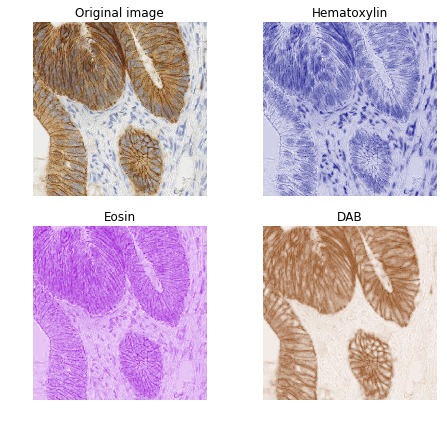

In [2]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the orginal one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white','saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet','white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:  , :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

Now we can easily manipulate the hematoxylin and DAB "channels":



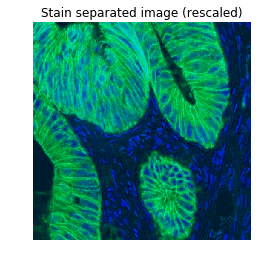

In [3]:
import numpy as np

from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
axis.imshow(zdh)
axis.set_title("Stain separated image (rescaled)")
axis.axis('off')
plt.show()

# 学习部分

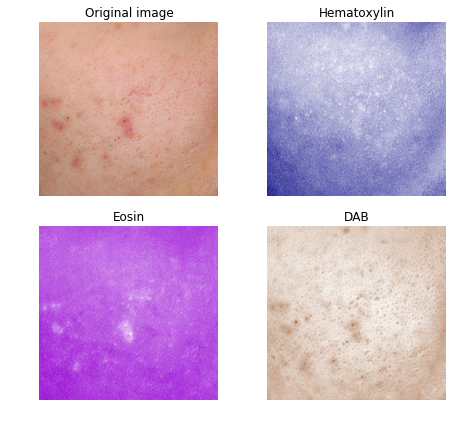

In [5]:
import matplotlib.pyplot as plt
from skimage import io,data
from skimage,color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the orginal one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

ihc_rgb = io.imread('/home/mixslice/Develop/mote/skimage_example/auto_examples_jupyter/test_image.jpg')
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

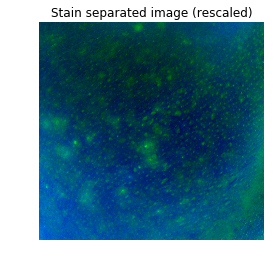

In [6]:
import numpy as np

from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
axis.imshow(zdh)
axis.set_title("Stain separated image (rescaled)")
axis.axis('off')
plt.show()